C:\Users\janic\AppData\Local\Temp\ipykernel_92840\2279361839.py:20: RankWarning: Polyfit may be poorly conditioned
  male_coeffs = np.polyfit(age_midpoints, male_medians, 9)


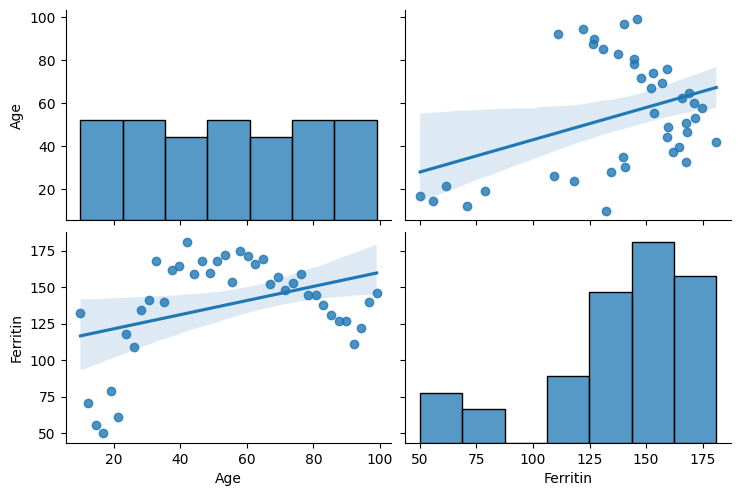

In [34]:
import numpy as np
import pandas as pd
import seaborn as sns

# Set the random seed for reproducibility
#np.random.seed(42) # standard
#np.random.seed(0) # seed for other dataset
np.random.seed(1) # seed for other dataset


# Provided data
age_labels = ['10-19', '20-29', '30-39', '40-49', '50-59',
              '60-69', '70-79', '80-89', '90-99']
male_medians = [60, 110, 160, 170, 165, 160, 155, 140, 120]

# Convert age_labels to numeric values (midpoint of each range)
age_midpoints = np.array([15, 25, 35, 45, 55, 65, 75, 85, 95])

# Fit quadratic (degree 2) polynomial for males to get coefficients
male_coeffs = np.polyfit(age_midpoints, male_medians, 9)

# Generate continuous age data (from 10 to 99)
continuous_ages = np.linspace(10, 99, 40)  # 100 data points between 10 and 99

# Simulate real data points (with noise) based on the quadratic equation
noise_level = 10  # Standard deviation of the noise added to the data
simulated_data = np.polyval(male_coeffs, continuous_ages) + np.random.normal(0, noise_level, size=len(continuous_ages))

# Create a DataFrame for formula interface
data = pd.DataFrame({
    'Age': continuous_ages,
    'Ferritin': simulated_data
})

sns.pairplot(data, kind='reg', height=2.5, aspect=1.5)

data.to_csv("ferritin_polynomialregression_2.csv", index=False)

In [28]:
import numpy as np
import pandas as pd

# Set the random seed for reproducibility
np.random.seed(42)

# Number of observations
n = 1000

# Simulate independent variables
age = np.random.normal(70, 8, n).astype(int)  # Age with mean 70 and standard deviation 8, converted to integers
education = np.random.normal(14, 3, n)  # Education level in years with mean 14 and standard deviation 3
apoe4 = np.random.choice([0, 1], n, p=[0.8, 0.2])  # APOE4 gene status (0 = no, 1 = yes)
cognitive_score = np.random.normal(27, 4, n)  # Cognitive test score with mean 27 and standard deviation 4

# Simulate the dependent variable (binary outcome: Alzheimer's disease)
# Using a logistic function to create a binary outcome based on the independent variables
log_odds = 0.06 * age - 0.01 * education + 1.2 * apoe4 - 0.1 * cognitive_score - 2
probabilities = 1 / (1 + np.exp(-log_odds))
alzheimers = np.random.binomial(1, probabilities)

# Create a DataFrame
data = pd.DataFrame({
    'Age': age,
    'Education': education,
    'APOE4': apoe4,
    'Cognitive_Score': cognitive_score,
    'Alzheimers': alzheimers
})

# Display the first few rows of the DataFrame
data.to_csv("alzheimer_logisticregression.csv", index=False)

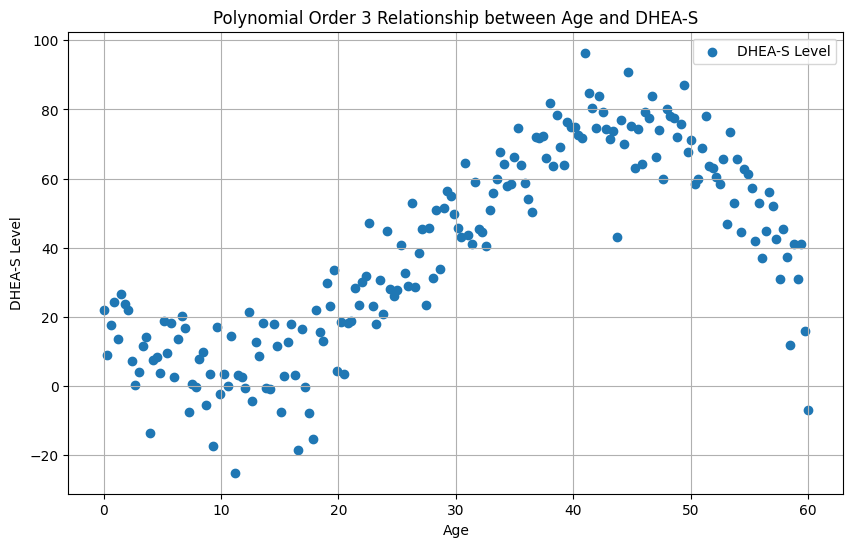

In [96]:

import numpy as np
import matplotlib.pyplot as plt

# Define the coefficients for the cubic polynomial
a = -0.0032  # More negative to enhance the cubic effect
b = 0.26  # Positive to create the middle plateau and increase
c = -4      # More negative to control the initial increase
d = 20       # Intercept to set the baseline amyloid level

# Generate age values from 0 to 100
age = np.linspace(0, 60, 200)

# Calculate amyloid levels using the cubic polynomial
DHEAS = a * age**3 + b * age**2 + c * age + d + np.random.normal(0, 10, 200)



# Create a DataFrame
data = pd.DataFrame({
    'Age': age,
    'DHEAS': DHEAS
})

# Display the first few rows of the DataFrame
data.to_csv("DHEA-S_hormone_age.csv", index=False)


# Plot the relationship
plt.figure(figsize=(10, 6))
plt.scatter(age, DHEAS, label='DHEA-S Level')
plt.title('Polynomial Order 3 Relationship between Age and DHEA-S')
plt.xlabel('Age')
plt.ylabel('DHEA-S Level')
plt.legend()
plt.grid(True)
plt.show()





In [121]:
import numpy as np
import pandas as pd

# Set random seed for reproducibility
np.random.seed(42)

# Number of observations
n = 250

# Simulate independent variables
age = np.random.normal(60, 10, n)  # Age with mean 60 and standard deviation 10
gender = np.random.choice([0, 1], n, p=[0.5, 0.5])  # 0 = Female, 1 = Male
family_history = np.random.choice([0, 1], n, p=[0.85, 0.15])  # 0 = No family history, 1 = Yes family history
motor_function_score = np.random.normal(30, 5, n)  # Motor function score, typically between 0 and 40, mean 30 and std 5
smoking_history = np.random.choice([0, 1], n, p=[0.7, 0.3])  # 0 = No smoking, 1 = Smoking history
c9orf72_mutation = np.random.choice([0, 1], n, p=[0.95, 0.05])  # 0 = No, 1 = Yes (genetic mutation)

# Simulate the dependent variable (binary outcome: ALS)
# Using a logistic function to create a binary outcome based on the independent variables
log_odds = -5 + 0.07 * age + 0.5 * gender + 2.2 * family_history - 0.1 * motor_function_score + 0.001 * smoking_history + 2.8 * c9orf72_mutation
probabilities = 1 / (1 + np.exp(-log_odds))  # Convert log odds to probabilities
als_outcome = np.random.binomial(1, probabilities)

# Create a DataFrame
data = pd.DataFrame({
    'Age': age,
    'Gender': gender,
    'Family_History': family_history,
    'Motor_Function_Score': motor_function_score,
    'Smoking_History': smoking_history,
    'C9orf72_Mutation': c9orf72_mutation,
    'ALS': als_outcome
})

# Display the first few rows of the DataFrame
data.head()

data.to_csv("ALS_regression.csv", index=False)


In [32]:
import numpy as np
import pandas as pd

np.random.seed(42)

n_patients = 120
age = np.random.randint(40, 80, size=n_patients)
therapy_duration = np.random.uniform(20, 120, size=n_patients)

# Cognitive score (target)
noise = np.random.normal(15, 20, size=n_patients)
cognitive_score = np.maximum((0.2 * -age + (0.8 * therapy_duration) + noise) / 1, 0)

df = pd.DataFrame({
    "age": age,
    "therapy_duration": therapy_duration,
    "cognitive_score_after": cognitive_score
})

df.head()
df.to_csv("therapy_influence_regression.csv", index=False)

In [2]:
## Random Dataset with 1000 features and NO true relationship

import numpy as np
import pandas as pd
from sklearn.datasets import make_regression

# Set random seed for reproducibility
np.random.seed(42)

# Generate synthetic dataset with NO true relationship
# 50 samples, 1000 features, all completely random
n_samples = 50
n_features = 1000

print("Generating synthetic high-dimensional dataset...")
print(f"Samples: {n_samples}")
print(f"Features: {n_features}")
print("All features and target are completely random (no true relationships)")

# Method 1: Using make_regression with no informative features
X, y = make_regression(
    n_samples=n_samples,
    n_features=n_features,
    n_informative=0,  # No truly informative features
    noise=1.0,        # Add noise
    random_state=42
)

# Method 2: Alternatively, generate completely random data
# X = np.random.randn(n_samples, n_features)
# y = np.random.randn(n_samples)

# Create feature names
feature_names = [f'feature_{i:04d}' for i in range(n_features)]

# Create DataFrame
df = pd.DataFrame(X, columns=feature_names)
df['target'] = y

# Basic statistics
print(f"\nDataset shape: {df.shape}")
print(f"Target mean: {y.mean():.3f}, std: {y.std():.3f}")
print(f"Feature matrix mean: {X.mean():.3f}, std: {X.std():.3f}")

# Verify no correlations should exist (check a few random correlations)
random_features = np.random.choice(feature_names, 5, replace=False)
print(f"\nSample correlations with target (should be close to 0):")
for feat in random_features:
    corr = df[feat].corr(df['target'])
    print(f"{feat}: {corr:.4f}")

# Save the dataset
filename = 'synthetic_highdim_dataset.csv'
df.to_csv(filename, index=False)

print(f"\n✅ Dataset saved as '{filename}'")
print(f"Ready for analysis to demonstrate:")
print("• Multiple testing problem")
print("• False discovery risk with many features")
print("• Overfitting in high-dimensional settings")
print("• Need for regularization and proper validation")

# Quick verification that file was saved correctly
verification_df = pd.read_csv(filename)
print(f"\n🔍 Verification - loaded shape: {verification_df.shape}")

Generating synthetic high-dimensional dataset...
Samples: 50
Features: 1000
All features and target are completely random (no true relationships)

Dataset shape: (50, 1001)
Target mean: 0.075, std: 0.975
Feature matrix mean: -0.000, std: 1.000

Sample correlations with target (should be close to 0):
feature_0521: 0.0169
feature_0737: 0.0316
feature_0740: -0.0115
feature_0660: -0.0618
feature_0411: 0.1727

✅ Dataset saved as 'synthetic_highdim_dataset.csv'
Ready for analysis to demonstrate:
• Multiple testing problem
• False discovery risk with many features
• Overfitting in high-dimensional settings
• Need for regularization and proper validation

🔍 Verification - loaded shape: (50, 1001)


In [5]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_regression

# Set random seed for reproducibility
np.random.seed(42)

# Dataset parameters
n_samples = 50
n_informative = 10      # 10 truly relevant features
n_noise = 990          # 990 noise features
n_features_total = n_informative + n_noise

print("Generating mixed signal-noise dataset...")
print(f"Samples: {n_samples}")
print(f"Informative features: {n_informative}")
print(f"Noise features: {n_noise}")
print(f"Total features: {n_features_total}")

# Generate dataset with true signal
X, y, true_coef = make_regression(
    n_samples=n_samples,
    n_features=n_features_total,
    n_informative=n_informative,    # Only first 10 features are truly predictive
    noise=0.1,                      # Small amount of noise in target
    shuffle=False,                  # Keep informative features first
    coef=True,                      # Return true coefficients
    random_state=42
)

print(f"\nDataset characteristics:")
print(f"Target mean: {y.mean():.3f}, std: {y.std():.3f}")
print(f"Feature matrix shape: {X.shape}")

# Create feature names that clearly identify signal vs noise
feature_names = []
# First 10 are the true signal features
for i in range(n_informative):
    feature_names.append(f'signal_{i:02d}')
# Next 990 are pure noise
for i in range(n_noise):
    feature_names.append(f'noise_{i:03d}')

# Create DataFrame
df = pd.DataFrame(X, columns=feature_names)
df['target'] = y

# Show which features are truly important
true_signal_features = feature_names[:n_informative]
print(f"\nTrue signal features: {true_signal_features}")
print(f"True coefficients (non-zero):")
for i, coef in enumerate(true_coef[:n_informative]):
    if abs(coef) > 1e-10:  # Only show non-zero coefficients
        print(f"  {feature_names[i]}: {coef:.4f}")

# Verify noise features have zero coefficients
noise_coefs = true_coef[n_informative:]
print(f"\nNoise feature coefficients (should all be 0): {np.sum(np.abs(noise_coefs) > 1e-10)} non-zero")

# Check correlations between signal features and target
print(f"\nCorrelations with target:")
print("Signal features:")
for feat in true_signal_features[:5]:  # Show first 5
    corr = df[feat].corr(df['target'])
    print(f"  {feat}: {corr:.4f}")

print("Random noise features:")
random_noise = np.random.choice([f for f in feature_names if f.startswith('noise_')], 5, replace=False)
for feat in random_noise:
    corr = df[feat].corr(df['target'])
    print(f"  {feat}: {corr:.4f}")

# Save the dataset
filename = 'synthetic_highdim_signal_dataset.csv'
df.to_csv(filename, index=False)

# Also save metadata about which features are truly important
metadata = {
    'n_samples': n_samples,
    'n_informative': n_informative,
    'n_noise': n_noise,
    'true_signal_features': true_signal_features,
    'true_coefficients': true_coef[:n_informative].tolist()
}

import json
with open('dataset_metadata.json', 'w') as f:
    json.dump(metadata, f, indent=2)

print(f"\n✅ Dataset saved as '{filename}'")
print(f"✅ Metadata saved as 'dataset_metadata.json'")
print(f"\nReady to demonstrate:")
print("• Feature selection challenges in noisy high-dimensional data")
print("• How regularization can identify true signal among noise")
print("• Difference between significant and meaningful features")
print("• Proper validation when signal exists but is buried in noise")

# Quick verification
verification_df = pd.read_csv(filename)
print(f"\n🔍 Verification - loaded shape: {verification_df.shape}")

Generating mixed signal-noise dataset...
Samples: 50
Informative features: 10
Noise features: 990
Total features: 1000

Dataset characteristics:
Target mean: 7.803, std: 149.828
Feature matrix shape: (50, 1000)

True signal features: ['signal_00', 'signal_01', 'signal_02', 'signal_03', 'signal_04', 'signal_05', 'signal_06', 'signal_07', 'signal_08', 'signal_09']
True coefficients (non-zero):
  signal_00: 0.2771
  signal_01: 38.2523
  signal_02: 91.4049
  signal_03: 94.7755
  signal_04: 5.3559
  signal_05: 12.3422
  signal_06: 0.4870
  signal_07: 86.8674
  signal_08: 7.0886
  signal_09: 10.7900

Noise feature coefficients (should all be 0): 0 non-zero

Correlations with target:
Signal features:
  signal_00: -0.1530
  signal_01: 0.1573
  signal_02: 0.6469
  signal_03: 0.4915
  signal_04: 0.1020
Random noise features:
  noise_213: 0.0423
  noise_331: 0.2328
  noise_501: -0.0414
  noise_309: -0.0175
  noise_088: 0.0892

✅ Dataset saved as 'synthetic_highdim_signal_dataset.csv'
✅ Metadata s